<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png"
     width="200px"
     height="auto"/>
</p>

# <h1 align="center" id="heading">Sentiment Analysis of Twitter Data</h1>

<hr>


### ☑️ Objectives
At the end of this session, you will be able to:
- [ ] Understand how to find and run pre-trained models
- [ ] Evaluate results from pre-trained models
- [ ] Run a pre-trained model using real twitter data


### 🔨 Pre-Assignment

Create a new Conda environment for sentiment anaylsis (sa)

```bash
  conda create -n sa python=3.8 jupyter -y
```

Activate your new environment
```bash
  conda activate sa
```

Open the jupyter-notebook
```bash
  jupyter-notebook
```

Navigate through the repo in the notebook to find `imports.ipynb` for this week and open it.

Run all of the cells in the notebook.


### Background
Please review the weekly narrative [here](https://www.notion.so/Week-2-Data-Centric-AI-the-AI-Product-Lifecycle-72a84c1517b44fcbb3e6bd11d47477dc#2b73937612bb46559f5b91dc2bf55e7d)




<hr>

## 🚀 Let's Get Started

Let's first start with our imports

In [1]:
import csv # Allows us to read and write csv files
from pprint import pprint # Make our print functions easier to read

from transformers import pipeline # Hugging face pipeline to load online models

/Users/rnirms/anaconda3/envs/sa/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🤗 Transformers provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio.

These models can be applied on:
- 📝 Text, for tasks like text classification, information extraction, question answering, summarization, translation, text generation, in over 100 languages.

- 🖼️ Images, for tasks like image classification, object detection, and segmentation.
- 🗣️ Audio, for tasks like speech recognition and audio classification.

This is the pipeline method in transformers that we'll be using to analyze our sentiment data. Since we're not specifying a pretrained model, the pipeline has a default sentiment analysis model called [distilbert-base-uncased-finetuned-sst-2-english](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).

In [2]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [4]:
sentiment_pipeline

In this example, we'll supply two polar sentiments and test out the model pipeline.

In [5]:
data = ["This is great!", "Oh no!"]
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.9998694658279419},
 {'label': 'NEGATIVE', 'score': 0.994263231754303}]

The `label` in this case indicates the prediction for the sentiment type.

The `score` indicates the confidence of the prediction (between 0 and 1).

Since our sentiments were very polar, it was easier for the model to predict the sentiment type.

Let's see what happens when we use a less clear example:

In [6]:
challenging_sentiments = ["I don't think freddriq should leave, he's been helpful.",
                          "Is that the lake we went to last month?"]
sentiment_pipeline(challenging_sentiments)

[{'label': 'NEGATIVE', 'score': 0.9955562949180603},
 {'label': 'NEGATIVE', 'score': 0.9860844016075134}]

<hr>

### Loading the Twitter Data

Let's play with some twitter data. We'll be using a modified version of the [Elon Musk twitter dataset on Kaggle](https://www.kaggle.com/datasets/andradaolteanu/all-elon-musks-tweets).

In [19]:
with open('../data/elonmusk_tweets.csv', newline='', encoding='utf8') as f:
    tweets=[]
    reader = csv.reader(f)
    twitter_data = list(reader)
    for tweet in twitter_data:
        tweets.append(tweet[0])

pprint(tweets[:100])

['@vincent13031925 For now. Costs are decreasing rapidly.',
 'Love this beautiful shot',
 '@agnostoxxx @CathieDWood @ARKInvest Trust the shrub',
 'The art In Cyberpunk is incredible',
 '@itsALLrisky 🤣🤣',
 '@seinfeldguru @WholeMarsBlog Nope haha',
 '@WholeMarsBlog If you don’t say anything &amp; engage Autopilot, it will '
 'soon guess based on time of day, taking you home or to work or to what’s on '
 'your calendar',
 '@DeltavPhotos @PortCanaveral That rocket is a hardcore veteran of many '
 'missions',
 'Blimps rock  https://t.co/e8cu5FkNOI',
 '@engineers_feed Due to lower gravity, you can travel from surface of Mars to '
 'surface of Earth fairly easily with a single stage rocket. Earth to Mars is '
 'vastly harder.',
 '@DrPhiltill Good thread',
 '@alexellisuk Pretty much',
 '@tesla_adri @WholeMarsBlog These things are best thought of as '
 'probabilities. There are 5 forward-facing cameras. It is highly likely that '
 'at least one of them will see multiple cars ahead.',
 '@WholeMa

In [26]:
reader #_csv.reader object  
print(len(twitter_data)) #List of lists of strings  
print(len(tweets)) #List of strings
# pprint helps print the list with 1 item per row

12562
12562


First things first - let's look at the sentiment as determined by the [distilbert-base-uncased-finetuned-sst-2-english](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) (default model) in the pipeline.

In [21]:
distil_sentiment = sentiment_pipeline(tweets[0:100])

In [54]:
len(distil_sentiment) #list of dictionaries?
distil_sentiment[0]

[{'label': 'NEGATIVE', 'score': 0.9963656663894653},
 {'label': 'NEGATIVE', 'score': 0.84983229637146},
 {'label': 'NEGATIVE', 'score': 0.9839497804641724},
 {'label': 'NEGATIVE', 'score': 0.9933285713195801},
 {'label': 'NEGATIVE', 'score': 0.9917682409286499},
 {'label': 'NEGATIVE', 'score': 0.9937851428985596},
 {'label': 'NEGATIVE', 'score': 0.9840983748435974},
 {'label': 'NEGATIVE', 'score': 0.9142526388168335},
 {'label': 'NEGATIVE', 'score': 0.9978026747703552},
 {'label': 'NEGATIVE', 'score': 0.9946601986885071},
 {'label': 'NEGATIVE', 'score': 0.9995997548103333},
 {'label': 'NEGATIVE', 'score': 0.9987119436264038},
 {'label': 'NEGATIVE', 'score': 0.9935503005981445},
 {'label': 'NEGATIVE', 'score': 0.9984368681907654},
 {'label': 'NEGATIVE', 'score': 0.9839497804641724},
 {'label': 'NEGATIVE', 'score': 0.9860665202140808},
 {'label': 'NEGATIVE', 'score': 0.9977408647537231},
 {'label': 'NEGATIVE', 'score': 0.9840652346611023},
 {'label': 'NEGATIVE', 'score': 0.94972556829452

Let's check out the distribution of positive/negative Tweets and see the breakdown using Python's 🐍 standard library `collections.Counter`!

In [32]:
from collections import Counter

tweet_distro = Counter([x['label'] for x in distil_sentiment])
pos_sent_count = tweet_distro['POSITIVE']
neg_sent_count = tweet_distro['NEGATIVE']
total_sent_count = sum(tweet_distro.values())

print(f"{pos_sent_count} ({pos_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are positive.")
print(f"{neg_sent_count} ({neg_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are negative.")

49 (49.00%) of the tweets classified are positive.
51 (51.00%) of the tweets classified are negative.


In [37]:
tweet_distro #Counter object with counts for each 'label' stored as a dictionary 
tweet_distro.keys() #Shows keys 
tweet_distro.values() #Shows values 

dict_values([51, 49])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 12.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 628.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 2.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 6.5 MB/s eta 0:00:0000:01


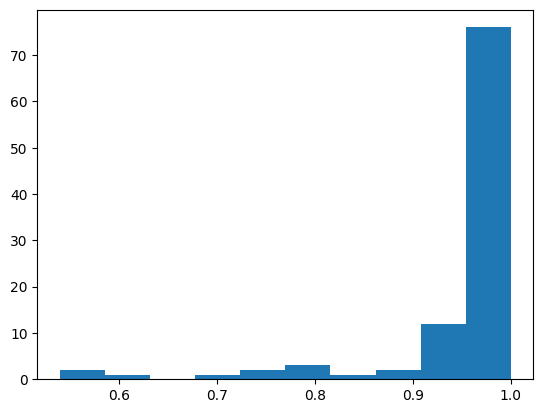

In [39]:
# Histogram of scores - will it be bimodal? Very strong positive and very strong negative tweets?
!pip install matplotlib 
!pip install numpy

import matplotlib.pyplot as plt
import numpy as np

scores = [x['score'] for x in distil_sentiment]
plt.hist(scores)
plt.show()

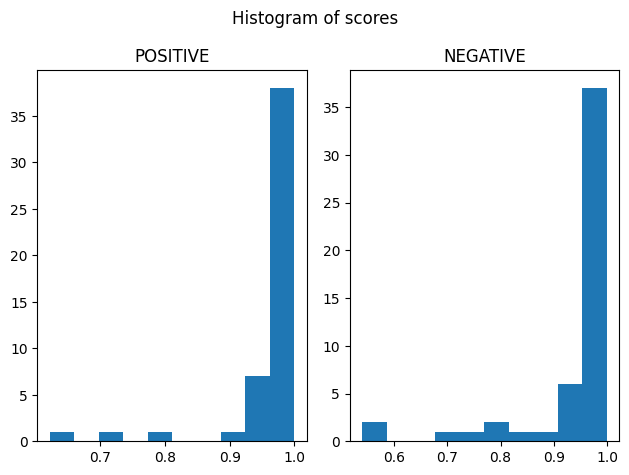

In [66]:
#Scores are close to 1! So what was the threshold used to get a 49-51 split?
#Show the histogram separately for POSITIVE and NEGATIVE 
ds_score_pos = [ x['score'] for x in distil_sentiment if x['label']=='POSITIVE' ]
ds_score_neg = [ x['score'] for x in distil_sentiment if x['label']=='NEGATIVE' ]


fig, axs = plt.subplots(1,2)

axs[0].set_title('POSITIVE')
axs[0].hist(ds_score_pos)

axs[1].set_title('NEGATIVE')
axs[1].hist(ds_score_neg)

fig.suptitle('Histogram of scores')
plt.tight_layout()
plt.show()

#Turns out the outputs are that of a softmax/binary classifier! P(POSITIVE) + P(NEGATIVE) is NOT 1. 
#Each class POSITIVE and NEGATIVE has its own probability.
#It looks like a pretty confident model with most scores above 0.9! 

Let's do that process again, but use a model with an additional potential label "NEUTRAL" called [bertweet-sentiment-analysis](https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis)

To start - we'll build a pipeline with the new model by using the 🤗 Hugging Face address: `finiteautomata/bertweet-base-sentiment-analysis`

In [67]:
bertweet_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

Downloading: 100%|██████████████████████████████████████| 1.42k/1.42k [00:00<00:00, 442kB/s]


Next, and the same as before, let's run the analysis on 100 of Elon's tweets.

In [68]:
bert_sentiment = bertweet_pipeline(tweets[0:100])

In [70]:
print(f"(Tweet) {tweet[0]}, (Sentiment) {bert_sentiment[0]}")

(Tweet) @Erdayastronaut @Tesla Tesla is building up collision repair capability to help address the grief that you went through, but usually insurance companies make you go their “approved” collision repair partners. Tesla Insurance will make it smooth sailing., (Sentiment) {'label': 'NEU', 'score': 0.9523929953575134}


And then, let's check out the breakdown of positive, negative, AND neutral sentiments!

In [71]:
from collections import Counter

tweet_distro = Counter([x['label'] for x in bert_sentiment])
pos_sent_count = tweet_distro['POS']
neu_sent_count = tweet_distro['NEU']
neg_sent_count = tweet_distro['NEG']
total_sent_count = sum(tweet_distro.values())

print(f"{pos_sent_count} ({pos_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are positive.")
print(f"{neu_sent_count} ({neu_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are neutral.")
print(f"{neg_sent_count} ({neg_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are negative.")

29 (29.00%) of the tweets classified are positive.
64 (64.00%) of the tweets classified are neutral.
7 (7.00%) of the tweets classified are negative.


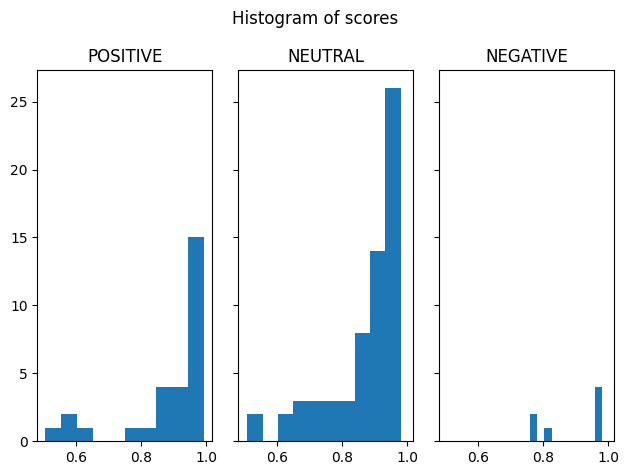

In [90]:
ds_score_pos = [ x['score'] for x in bert_sentiment if x['label']=='POS' ]
ds_score_neu = [ x['score'] for x in bert_sentiment if x['label']=='NEU' ]
ds_score_neg = [ x['score'] for x in bert_sentiment if x['label']=='NEG' ]

fig, axs = plt.subplots(1,3, sharey='row', sharex='row')

axs[0].set_title('POSITIVE')
axs[0].hist(ds_score_pos)

axs[1].set_title('NEUTRAL')
axs[1].hist(ds_score_neu)

axs[2].set_title('NEGATIVE')
axs[2].hist(ds_score_neg)

fig.suptitle('Histogram of scores')
plt.tight_layout()
plt.show()

In [114]:
#Show the 64% neutral tweets 
for i in range(100):
    if((bert_sentiment[i]['label']=='NEU') & (distil_sentiment[i]['label']=='NEGATIVE')):
        print(f"{tweets[i]}: {distil_sentiment[i]['label']}")
for i in range(100):    
    if((bert_sentiment[i]['label']=='NEU') & (distil_sentiment[i]['label']=='POSITIVE')):
        print(f"{tweets[i]}: {distil_sentiment[i]['label']}")

@vincent13031925 For now. Costs are decreasing rapidly.: NEGATIVE
@agnostoxxx @CathieDWood @ARKInvest Trust the shrub: NEGATIVE
@seinfeldguru @WholeMarsBlog Nope haha: NEGATIVE
@WholeMarsBlog If you don’t say anything &amp; engage Autopilot, it will soon guess based on time of day, taking you home or to work or to what’s on your calendar: NEGATIVE
@engineers_feed Due to lower gravity, you can travel from surface of Mars to surface of Earth fairly easily with a single stage rocket. Earth to Mars is vastly harder.: NEGATIVE
@tesla_adri @WholeMarsBlog These things are best thought of as probabilities. There are 5 forward-facing cameras. It is highly likely that at least one of them will see multiple cars ahead.: NEGATIVE
@WholeMarsBlog Sensors are a bitstream and cameras have several orders of magnitude more bits/sec than radar (or lidar).   Radar must meaningfully increase signal/noise of bitstream to be worth complexity of integrating it.   As vision processing gets better, it just leav

The posts that distil_bert treated as NEGATIVE or POSITIVE actually do look more neutral. Elon Musk seems like an optimistic person on Twitter! 

In [116]:
# Show the tweets that are positive for both models
for i in range(100):
    if((bert_sentiment[i]['label']=='POS') & (distil_sentiment[i]['label']=='POSITIVE')):
        print(f"{tweets[i]}")

Love this beautiful shot
The art In Cyberpunk is incredible
@DrPhiltill Good thread
@memescryptor !
@teslaownersSV @neuralink Turns out 🐒 love video games &amp; snacks just like us!
@w00ki33 @SpaceX @SuperclusterHQ Simulation is improving rendering resolution  …
Thanks to all that helped SpaceX!
Just read it. Book is accurate.
@thenewsoncnbc @contessabrewer Good piece!
@TarekWaked @TechCrunch @etherington Pretty much 🤣🤣 Great episode!
@IheartTesla Absolutely doable. Possibly as soon as Neuralink device version 2, highly likely by version 3.
@IheartTesla @neuralink Hopefully, later this year
Thanks Tesla suppliers for providing us with critical parts!
@jgrano305 Probably J&amp;J, but BioNtech &amp; Moderna are good too. Some debate imo as to whether a second synthetic mRNA shot is really needed, but the first is a no-brainer.
@WholeMarsBlog Well-written and fair, much like his articles on space
@louisssdev @flcnhvy Coming soon. Crazy number of launches this year!
@Thomas38697956 New &am

In [117]:
# Show the tweets that are negative for both models
for i in range(100):
    if((bert_sentiment[i]['label']=='NEG') & (distil_sentiment[i]['label']=='NEGATIVE')):
        print(f"{tweets[i]}")

@itsALLrisky 🤣🤣
@WholeMarsBlog This is a major problem!
But wait how is the core of the earth lit by the sun? Stop asking questions!!
@itsALLrisky 💯
First @Neuralink product will enable someone with paralysis to use a smartphone with their mind faster than someone using thumbs
@GerberKawasaki I fried a lot of neurons on that problem!


Both models make a mistake with these tweets - they dont sound Negative at all!:
@itsALLrisky 🤣🤣
First @Neuralink product will enable someone with paralysis to use a smartphone with their mind faster than someone using thumbs

In [112]:
# Show the tweets were the models disagree with each other (POS->NEG) or (NEG->POS)
for i in range(100):
    if((bert_sentiment[i]['label']=='POS') & (distil_sentiment[i]['label']=='NEGATIVE')):
        print(f"{tweets[i]}: {bert_sentiment[i]['label']}, {distil_sentiment[i]['label']}")
    if((bert_sentiment[i]['label']=='NEG') & (distil_sentiment[i]['label']=='POSITIVE')):
        print(f"{tweets[i]}: {bert_sentiment[i]['label']}, {distil_sentiment[i]['label']}")
        

Blimps rock  https://t.co/e8cu5FkNOI: POS, NEGATIVE
Kong vs Godzilla has record for most meth ever consumed in a writer’s room: NEG, POSITIVE
@AustinTeslaClub @OwenSparks_ @WholeMarsBlog Good point.   Next major software rev will do much better with automating wipers, seat heating &amp; defrost.   Probable seat settings just based on occupant mass distribution should be possible.: POS, NEGATIVE
@cleantechnica Congrats to NIO. That is a tough milestone.: POS, NEGATIVE
Soon our monkey will be on twitch &amp; discord haha: POS, NEGATIVE
@Julius_Burton @Erdayastronaut @DJSnM @NASASpaceflight @ChrisG_NSF @thejackbeyer @FelixSchlang Nice: POS, NEGATIVE


bert_sentiment seems to be correct with these - they do look positive: 
@AustinTeslaClub @OwenSparks_ @WholeMarsBlog Good point.   Next major software rev will do much better with automating wipers, seat heating &amp; defrost.   Probable seat settings just based on occupant mass distribution should be possible.: POS, NEGATIVE
@cleantechnica Congrats to NIO. That is a tough milestone.: POS, NEGATIVE

❓ What do you notice about the difference in the results? 

❓ Do the results for the `bertweet-base` model look better, or worse, than the results for the `distilbert-base` model? Why?

What do you notice about the difference in the results?

- bertweet-base model moves most of the NEGATIVEs and some of the POSITIVEs in distilbert-base to neutral class. If you look at the neutral tweets indeed many of them look neutral.  
- both models make some mistakes together:
Both models make a mistake with these tweets - they dont sound Negative at all!:
@itsALLrisky 🤣🤣
First @Neuralink product will enable someone with paralysis to use a smartphone with their mind faster than someone using thumbs
- for the tweets in which they disagree, bert_sentiment seems to be more correct with these - they do look positive: 
@AustinTeslaClub @OwenSparks_ @WholeMarsBlog Good point.   Next major software rev will do much better with automating wipers, seat heating &amp; defrost.   Probable seat settings just based on occupant mass distribution should be possible.: POS, NEGATIVE
@cleantechnica Congrats to NIO. That is a tough milestone.: POS, NEGATIVE


Do the results for the bertweet-base model look better, or worse, than the results for the distilbert-base model? Why?

Overall, it looks like bertweet-base model is doing better that the distilbert-base model by having an additional NEUtral class. When the models disagree sentiments on POS vs NEG sentiments, the ones bertweet-base declares as POSITIVE seem correct. 

<hr>

### Partner Exercise

With your partner, try and determine what the following tweets might be classified as. Try to classify them into the same groups as both of the model pipelines we saw today - and try adding a few of your own sentences/Tweets! 

In [123]:
# difficult tweets for distil_bert 
for i in range(100): 
    if((distil_sentiment[i]['score'] < 0.7) or (bert_sentiment[i]['score'] < 0.7)): 
        print(tweets[i])
    

Blimps rock  https://t.co/e8cu5FkNOI
Kong vs Godzilla has record for most meth ever consumed in a writer’s room
@Matsu_Kusarine @jagarikin Actually happened to me in Cyberpunk haha
@memescryptor !
@cleantechnica Congrats to NIO. That is a tough milestone.
@WholeMarsBlog Almost ready with FSD Beta V9.0. Step change improvement is massive, especially for weird corner cases &amp; bad weather. Pure vision, no radar.
Soon our monkey will be on twitch &amp; discord haha
A monkey is literally playing a video game telepathically using a brain chip!!
The device is implanted flush with skull &amp; charges wirelessly, so you look &amp; feel totally normal
@dogeofficialceo @WatchersTank @SpaceX Looking at pups soon!
@jordanxmajel @WatchersTank @SpaceX Shock absorption is built into tower arms. Since tower is ground side, it can use a lot more mass to arrest booster downward momentum.
@ID_AA_Carmack Some kind of ELO level, updated once or twice a year based on what someone actually got done, might 

In [133]:
example_difficult_tweets = [
    "Kong vs Godzilla has record for most meth ever consumed in a writer's room",
    "@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are very close to autonomous.",
    "Tesla's action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&P500 company.",
    "Coming to this restaurant is of course a no-brainer! Where else will we go to!",
    "Pretty much",
]

The `distilbert-base` model:

In [134]:
for tweet in example_difficult_tweets[0:1000]:
    pprint(sentiment_pipeline(tweet))
    print(tweet + '\n')

[{'label': 'POSITIVE', 'score': 0.5429087281227112}]
Kong vs Godzilla has record for most meth ever consumed in a writer's room

[{'label': 'NEGATIVE', 'score': 0.6348389387130737}]
@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are very close to autonomous.

[{'label': 'POSITIVE', 'score': 0.9419693350791931}]
Tesla's action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&P500 company.

[{'label': 'POSITIVE', 'score': 0.9940442442893982}]
Coming to this restaurant is of course a no-brainer! Where else will we go to!

[{'label': 'POSITIVE', 'score': 0.9996918439865112}]
Pretty much



The `bertweet-base` model:

In [135]:
for tweet in example_difficult_tweets[0:1000]:
    pprint(bertweet_pipeline(tweet))
    print(tweet + '\n')

[{'label': 'NEG', 'score': 0.7213013768196106}]
Kong vs Godzilla has record for most meth ever consumed in a writer's room

[{'label': 'NEU', 'score': 0.8023843169212341}]
@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are very close to autonomous.

[{'label': 'NEU', 'score': 0.8843538165092468}]
Tesla's action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&P500 company.

[{'label': 'NEG', 'score': 0.8088064193725586}]
Coming to this restaurant is of course a no-brainer! Where else will we go to!

[{'label': 'NEU', 'score': 0.5120360851287842}]
Pretty much



❓ How did you do? Did you find any surprising results? 

❓ Are there any instances where the two models gave different predictions for the same tweet?

How did you do? Did you find any surprising results?

Yes! I was leaning towards using berttweet-base as a better model but for my ambiguous positive statement (Coming to this restaurant is of course a no-brainer! Where else will we go to!) it declared it NEGATIVE when distilbert-base model managed to call it POSITIVE. That was surprising. 

Are there any instances where the two models gave different predictions for the same tweet?

Yes indeed! All 5 of them! 


Sentiment is really subjective and so the analysis very much dependent on how well the models have learnt the nuances of the language, and also nuances of language used in Twitter or even more specifically Musk (he says Pretty much a lot!). The two models have been trained on different datasets - distilbert-base on more generic language understanding data like GLUE, and berttweet-base on a corpus of English tweets. The classes themselves are different and it appears that POS/NEU/NEG is better than POSITIVE/NEGATIVE. This assignment shows how we should be married to the data that we are trying to analyse more than the nuances of the transformer model architecture or performance on generic large datasets.  